<a href="https://colab.research.google.com/github/Durgasiv/Twitter--sentiment-analysis/blob/main/sentiment_analysis_of_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install textblob

time: 7.04 s (started: 2024-03-05 16:47:45 +00:00)


In [ ]:
from textblob import TextBlob

time: 516 µs (started: 2024-03-05 16:47:52 +00:00)


In [ ]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

time: 868 µs (started: 2024-03-05 16:47:52 +00:00)


In [ ]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/Twitter_Data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

<ipython-input-235-6f84d2f9e5de>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Twitter_Data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)


,target,ids,date,flag,user,text
45653,there was need invoke nehruits achievement spa...,0,NaN,NaN,NaN,NaN
83970,badhaai mocks having completed 100 scams,0,NaN,NaN,NaN,NaN
25671,much anticipated book now available amazon and...,1,NaN,NaN,NaN,NaN
93136,yeddyurappas diary rs1800 crores given modis b...,1,NaN,NaN,NaN,NaN
141739,only congress and terrorists are not happy say...,-1.0,NaN,NaN,NaN,NaN


time: 491 ms (started: 2024-03-05 16:47:52 +00:00)


In [ ]:
df.head()

,target,ids,date,flag,user,text
0,clean_text,category,NaN,NaN,NaN,NaN
1,when modi promised âminimum government maxim...,-1,NaN,NaN,NaN,NaN
2,talk all the nonsense and continue all the dra...,0,NaN,NaN,NaN,NaN
3,what did just say vote for modi welcome bjp t...,1,NaN,NaN,NaN,NaN
4,asking his supporters prefix chowkidar their n...,1,NaN,NaN,NaN,NaN


time: 13 ms (started: 2024-03-05 16:47:53 +00:00)


In [ ]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

time: 4.22 ms (started: 2024-03-05 16:47:53 +00:00)


In [ ]:
print('length of data is', len(df))

length of data is 162981
time: 2.02 ms (started: 2024-03-05 16:47:53 +00:00)


In [ ]:
df. shape

(162981, 6)

time: 4.3 ms (started: 2024-03-05 16:47:53 +00:00)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162981 entries, 0 to 162980
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   target  162977 non-null  object 
 1   ids     162974 non-null  object 
 2   date    0 non-null       float64
 3   flag    0 non-null       float64
 4   user    0 non-null       float64
 5   text    0 non-null       float64
dtypes: float64(4), object(2)
memory usage: 7.5+ MB
time: 72.8 ms (started: 2024-03-05 16:47:53 +00:00)


In [ ]:
df.dtypes

target     object
ids        object
date      float64
flag      float64
user      float64
text      float64
dtype: object

time: 5.28 ms (started: 2024-03-05 16:47:53 +00:00)


In [ ]:
np.sum(df.isnull().any(axis=1))

162981

time: 76.7 ms (started: 2024-03-05 16:47:53 +00:00)


In [ ]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   162981
time: 844 µs (started: 2024-03-05 16:47:53 +00:00)


In [ ]:
df['target'].unique()

array(['clean_text',
       'when modi promised â\x80\x9cminimum government maximum governanceâ\x80\x9d expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples',
       'talk all the nonsense and continue all the drama will vote for modi ',
       ..., 'did you cover her interaction forum where she left ',
       'there big project came into india modi dream project but not happened reality',
       'have you ever listen about like gurukul where discipline are maintained even narendra modi rss only maintaining the culture indian more attack politics but someone attack hinduism rss will take action that proud for '],
      dtype=object)

time: 79 ms (started: 2024-03-05 16:47:53 +00:00)


In [ ]:
df['target'].nunique()

162977

time: 80.1 ms (started: 2024-03-05 16:47:53 +00:00)


In [ ]:
!pip install pandas

time: 6.13 s (started: 2024-03-05 16:47:53 +00:00)


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

time: 626 µs (started: 2024-03-05 16:47:59 +00:00)


In [ ]:
!pip install chardet

time: 6.84 s (started: 2024-03-05 16:47:59 +00:00)


In [ ]:
import chardet

time: 530 µs (started: 2024-03-05 16:48:06 +00:00)


In [ ]:
with open("/content/Twitter_Data.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

time: 38.4 s (started: 2024-03-05 16:48:06 +00:00)


In [ ]:
df['target'].value_counts()

clean_text                                                                                                                                                                                                                               1
according assam bjp candidate palab lushan das above years age india should get retired from politics also according him modi also takes retired and added that young generation should come for works                                   1
lok sabha election 2019 live modi has ignored his own constituency varanasi says priyanka gandhi                                                                                                                                         1
arnab asks modi about opposition saying asat announcement was violation poll code modi says that government can power can make mistakes but congress who has been power for long time should have considered these allegations           1
mrintelligent was claiming that they have attached more than

time: 180 ms (started: 2024-03-05 16:48:45 +00:00)


In [ ]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

time: 3.86 ms (started: 2024-03-05 16:48:45 +00:00)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162981 entries, 0 to 162980
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   target  162977 non-null  object 
 1   ids     162974 non-null  object 
 2   date    0 non-null       float64
 3   flag    0 non-null       float64
 4   user    0 non-null       float64
 5   text    0 non-null       float64
dtypes: float64(4), object(2)
memory usage: 7.5+ MB
time: 67.4 ms (started: 2024-03-05 16:48:45 +00:00)


In [ ]:

df.head()

,target,ids,date,flag,user,text
0,clean_text,category,NaN,NaN,NaN,NaN
1,when modi promised âminimum government maxim...,-1,NaN,NaN,NaN,NaN
2,talk all the nonsense and continue all the dra...,0,NaN,NaN,NaN,NaN
3,what did just say vote for modi welcome bjp t...,1,NaN,NaN,NaN,NaN
4,asking his supporters prefix chowkidar their n...,1,NaN,NaN,NaN,NaN


time: 10.1 ms (started: 2024-03-05 16:48:45 +00:00)


In [ ]:
df['target'].value_counts()

clean_text                                                                                                                                                                                                                               1
according assam bjp candidate palab lushan das above years age india should get retired from politics also according him modi also takes retired and added that young generation should come for works                                   1
lok sabha election 2019 live modi has ignored his own constituency varanasi says priyanka gandhi                                                                                                                                         1
arnab asks modi about opposition saying asat announcement was violation poll code modi says that government can power can make mistakes but congress who has been power for long time should have considered these allegations           1
mrintelligent was claiming that they have attached more than

time: 182 ms (started: 2024-03-05 16:48:45 +00:00)


In [ ]:
if 'target' not in df.columns:
    df['target'] = None

time: 650 µs (started: 2024-03-05 16:48:45 +00:00)


In [ ]:
if 'target' not in df.columns:
    raise KeyError('The "target" column does not exist in the dataframe.')

time: 633 µs (started: 2024-03-05 16:48:45 +00:00)


In [ ]:
import pandas as pd

time: 483 µs (started: 2024-03-05 16:48:45 +00:00)


In [ ]:
!file -i "/content/Twitter_Data.csv"

/content/Twitter_Data.csv: text/csv; charset=utf-8
time: 108 ms (started: 2024-03-05 16:48:45 +00:00)


In [ ]:
df = pd.read_csv("/content/Twitter_Data.csv", encoding="latin-1")

time: 378 ms (started: 2024-03-05 16:48:45 +00:00)


In [ ]:
!pip install chardet

time: 6.44 s (started: 2024-03-05 16:48:46 +00:00)


In [ ]:
import chardet

with open("/content/Twitter_Data.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

df = pd.read_csv("/content/Twitter_Data.csv", encoding=encoding)

time: 39 s (started: 2024-03-05 16:48:52 +00:00)


In [ ]:
df = pd.read_csv("/content/Twitter_Data.csv")

time: 412 ms (started: 2024-03-05 16:49:31 +00:00)


In [ ]:
print(df.columns)

Index(['clean_text', 'category'], dtype='object')
time: 1.59 ms (started: 2024-03-05 16:49:32 +00:00)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None
time: 49.7 ms (started: 2024-03-05 16:49:32 +00:00)


In [ ]:
if 'target' not in df.columns:
    print('The `target` column does not exist in the DataFrame.')

The `target` column does not exist in the DataFrame.
time: 1.58 ms (started: 2024-03-05 16:49:32 +00:00)


In [ ]:
print(df)

                                               clean_text  category
0       when modi promised “minimum government maximum...      -1.0
1       talk all the nonsense and continue all the dra...       0.0
2       what did just say vote for modi  welcome bjp t...       1.0
3       asking his supporters prefix chowkidar their n...       1.0
4       answer who among these the most powerful world...       1.0
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0

[162980 rows x 2 columns]
time: 6.1 ms (started: 2024-03-05 16:49:32 +00:00)


In [ ]:
print(df.index)
print(df.columns)

RangeIndex(start=0, stop=162980, step=1)
Index(['clean_text', 'category'], dtype='object')
time: 2.46 ms (started: 2024-03-05 16:49:32 +00:00)


In [ ]:
print('name' in df.__dict__)

False
time: 645 µs (started: 2024-03-05 16:49:32 +00:00)


In [ ]:
print(df.head())

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
time: 2.47 ms (started: 2024-03-05 16:49:32 +00:00)


In [ ]:
print('target' in df.columns)

False
time: 651 µs (started: 2024-03-05 16:49:32 +00:00)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

time: 619 µs (started: 2024-03-05 16:49:32 +00:00)


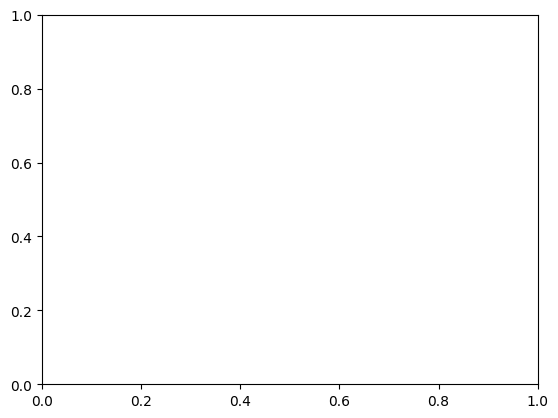

time: 211 ms (started: 2024-03-05 16:49:32 +00:00)


In [ ]:
fig, ax = plt.subplots()

In [ ]:
ax.set_xticklabels(['Negative','Positive'], rotation=0)

<ipython-input-274-7214b9eba547>:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Negative','Positive'], rotation=0)


[Text(0.0, 0, 'Negative'),
 Text(0.2, 0, 'Positive'),
 Text(0.4, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

time: 7.55 ms (started: 2024-03-05 16:49:32 +00:00)


In [ ]:
plt.show()

time: 1.34 ms (started: 2024-03-05 16:49:32 +00:00)


In [ ]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


time: 12.4 ms (started: 2024-03-05 16:49:32 +00:00)


In [ ]:
df.columns

Index(['clean_text', 'category'], dtype='object')

time: 3.88 ms (started: 2024-03-05 16:49:32 +00:00)


In [ ]:
text = list(df['clean_text'])

time: 41.3 ms (started: 2024-03-05 16:49:32 +00:00)


In [ ]:
print(df.columns)

Index(['clean_text', 'category'], dtype='object')
time: 1.93 ms (started: 2024-03-05 16:49:32 +00:00)


In [ ]:
df['target'] = None  # Your logic to create the target column

time: 3.55 ms (started: 2024-03-05 16:49:32 +00:00)


<Axes: xlabel='target', ylabel='count'>

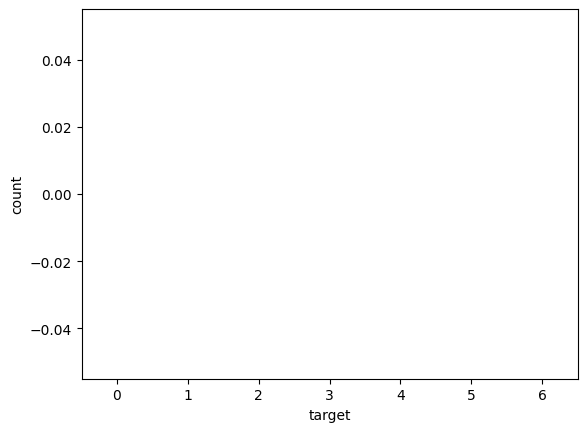

time: 476 ms (started: 2024-03-05 16:49:32 +00:00)


In [ ]:
sns.countplot(x='target', data=df)

<Axes: xlabel='target', ylabel='count'>

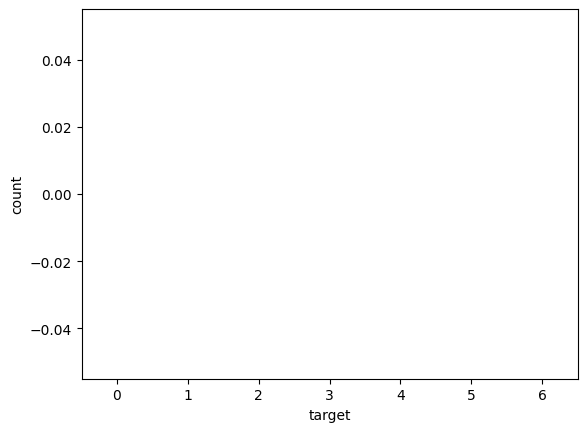

time: 354 ms (started: 2024-03-05 16:49:33 +00:00)


In [ ]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [ ]:
df = pd.DataFrame({"text": ["when modi promi…"], "target": [1]})

time: 1.86 ms (started: 2024-03-05 16:49:33 +00:00)


In [ ]:
data=df[['text','target']]

time: 2.07 ms (started: 2024-03-05 16:49:33 +00:00)


In [ ]:
print(data)

               text  target
0  when modi promi…       1
time: 5 ms (started: 2024-03-05 16:49:33 +00:00)


In [ ]:
data['target'] = data['target'].replace(4,1)

time: 1.6 ms (started: 2024-03-05 16:49:33 +00:00)


In [ ]:
data['target'].unique()

array([1])

time: 4.99 ms (started: 2024-03-05 16:49:33 +00:00)


In [ ]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

time: 3.85 ms (started: 2024-03-05 16:49:33 +00:00)


In [ ]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

time: 1.01 ms (started: 2024-03-05 16:49:33 +00:00)


In [ ]:
dataset = pd.concat([data_pos, data_neg])

time: 1.6 ms (started: 2024-03-05 16:49:33 +00:00)


In [ ]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()


0    when modi promi…
Name: text, dtype: object

time: 7.86 ms (started: 2024-03-05 16:49:33 +00:00)


In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

time: 856 µs (started: 2024-03-05 16:49:33 +00:00)


In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

0    modi promi…
Name: text, dtype: object

time: 12.5 ms (started: 2024-03-05 16:49:33 +00:00)


In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

0    modi promi…
Name: text, dtype: object

time: 5.91 ms (started: 2024-03-05 16:49:33 +00:00)


In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()


0    modi promi…
Name: text, dtype: object

time: 5.86 ms (started: 2024-03-05 16:49:33 +00:00)


In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

0    modi promi…
Name: text, dtype: object

time: 9.66 ms (started: 2024-03-05 16:49:33 +00:00)


In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

0    modi promi…
Name: text, dtype: object

time: 7.07 ms (started: 2024-03-05 16:49:33 +00:00)


In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

0    []
Name: text, dtype: object

time: 7.11 ms (started: 2024-03-05 16:49:33 +00:00)


In [ ]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

0    []
Name: text, dtype: object

time: 5.77 ms (started: 2024-03-05 16:49:33 +00:00)


In [ ]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

0    []
Name: text, dtype: object

time: 7.48 ms (started: 2024-03-05 16:49:33 +00:00)


In [ ]:
X=data.text
y=data.target

time: 877 µs (started: 2024-03-05 16:49:33 +00:00)


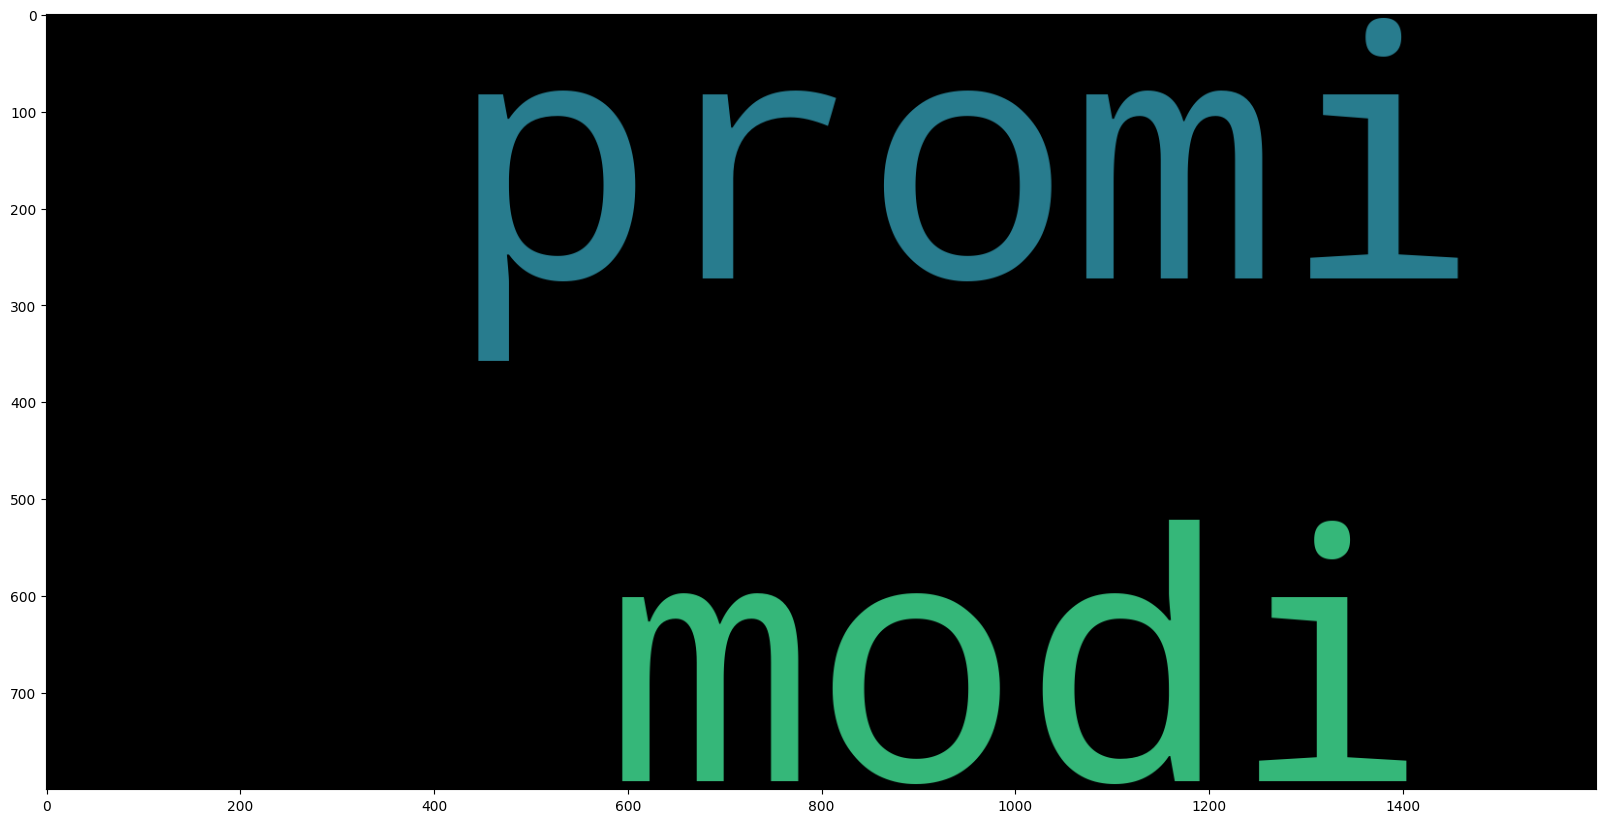

time: 1.16 s (started: 2024-03-05 16:49:33 +00:00)


In [ ]:
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)


In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

time: 5.95 s (started: 2024-03-05 16:49:34 +00:00)


In [ ]:
print(data_pos)

               text  target
0  when modi promi…       1
time: 4.39 ms (started: 2024-03-05 16:49:40 +00:00)


In [ ]:
print(len(data_pos))

1
time: 1.89 ms (started: 2024-03-05 16:49:40 +00:00)


In [ ]:
data_pos = data['text'][800000:]

time: 883 µs (started: 2024-03-05 16:49:40 +00:00)


In [ ]:
print(data_pos)

Series([], Name: text, dtype: object)
time: 1.3 ms (started: 2024-03-05 16:49:40 +00:00)


In [ ]:
# Print the type of data_pos
print(type(data_pos))

# Print the length of data_pos
print(len(data_pos))

# Print the first element of data_pos (if it exists)
if len(data_pos) > 0:
    print(data_pos[0])

<class 'pandas.core.series.Series'>
0
time: 3.27 ms (started: 2024-03-05 16:49:40 +00:00)


In [ ]:
data = pd.DataFrame({'text': ['when modi promised', '...'], 'target': [1, 2]})

time: 1.46 ms (started: 2024-03-05 16:49:40 +00:00)


In [ ]:
data_pos = data[data['target'] == 1]['text'].tolist()

time: 2.11 ms (started: 2024-03-05 16:49:40 +00:00)


In [ ]:
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))

time: 474 ms (started: 2024-03-05 16:49:40 +00:00)


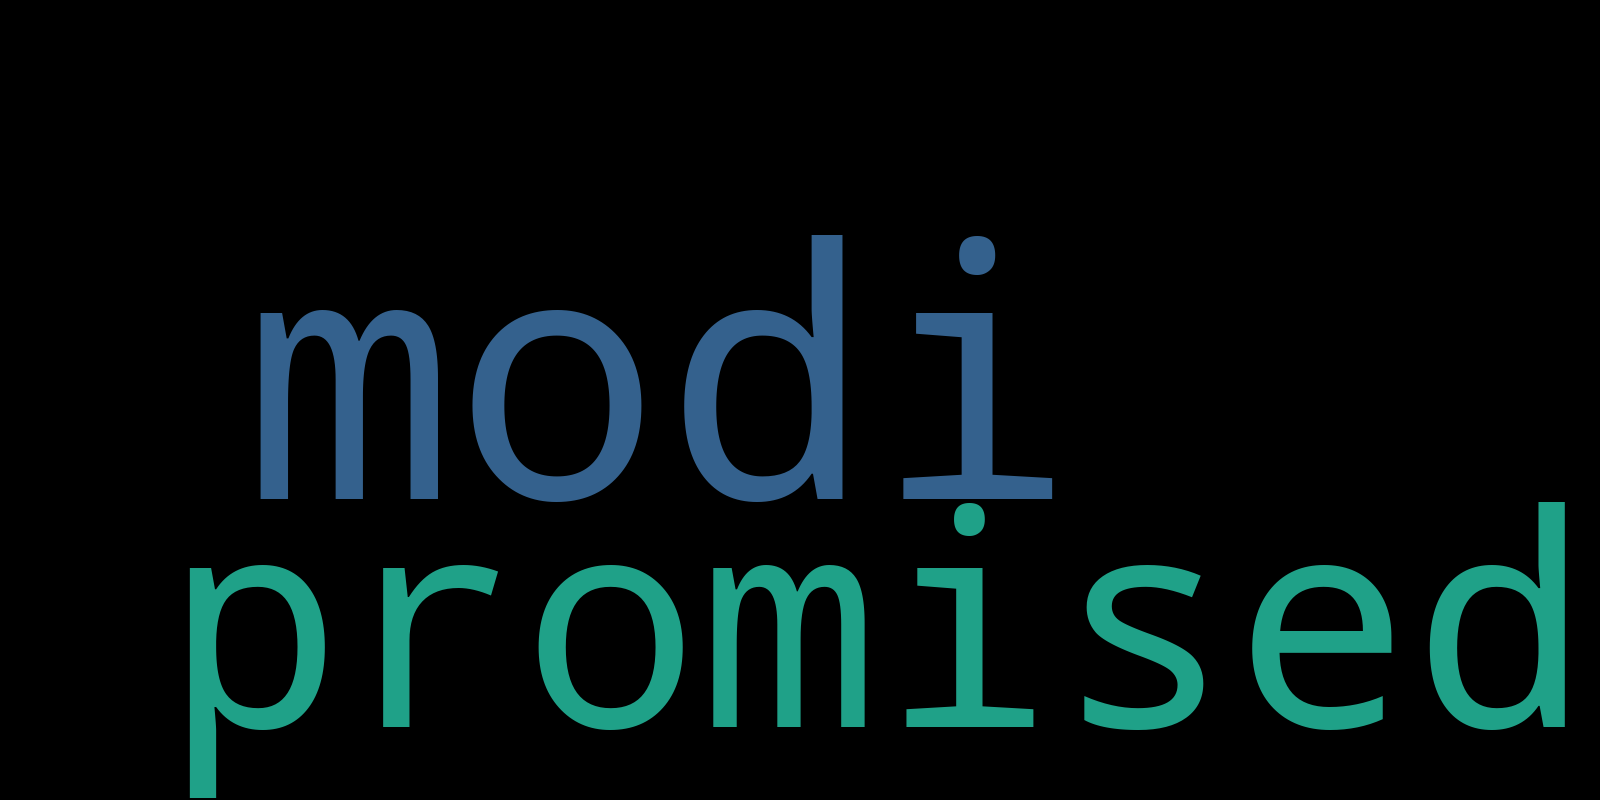

time: 125 ms (started: 2024-03-05 16:49:41 +00:00)


In [ ]:
wc.to_image()

time: 139 ms (started: 2024-03-05 16:49:41 +00:00)


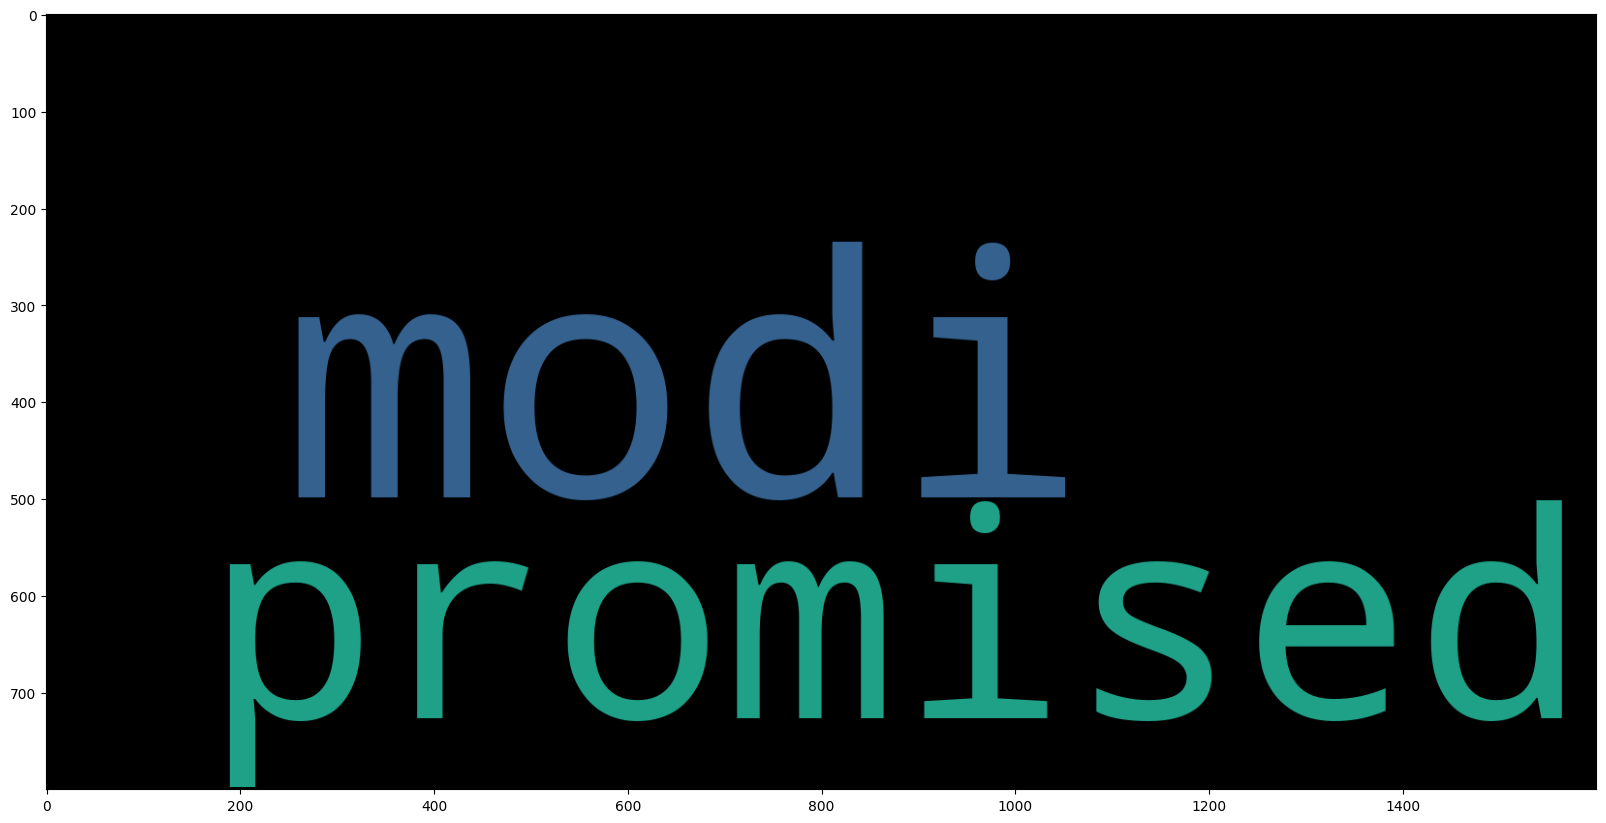

time: 1.15 s (started: 2024-03-05 16:49:41 +00:00)


In [ ]:
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [ ]:
from sklearn.model_selection import train_test_split

time: 513 µs (started: 2024-03-05 16:49:42 +00:00)


In [ ]:
# Option 1: Provide two arrays
X = [1]
y = [2]



time: 647 µs (started: 2024-03-05 16:49:42 +00:00)


In [ ]:
X = np.array(X)

time: 1.4 ms (started: 2024-03-05 16:49:42 +00:00)


In [ ]:
print(X.shape)

(1,)
time: 606 µs (started: 2024-03-05 16:49:42 +00:00)


In [ ]:
if isinstance(X, pd.DataFrame):
  print(f"Number of rows in X: {len(X)}")

time: 694 µs (started: 2024-03-05 16:49:42 +00:00)


In [ ]:
print("X_train" in globals())

True
time: 638 µs (started: 2024-03-05 16:49:42 +00:00)


In [ ]:
# Define and assign a value to X_train
X_train = ...  # Your data or value assignment

# Store the variable
%store X_train


Stored 'X_train' (ellipsis)
time: 3.89 ms (started: 2024-03-05 16:49:42 +00:00)


In [ ]:
%store X_train

Stored 'X_train' (ellipsis)
time: 2.78 ms (started: 2024-03-05 16:49:42 +00:00)


In [ ]:
X_train = ['This is the first document.', 'This is the second document.', ...]


time: 519 µs (started: 2024-03-05 16:49:42 +00:00)


In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)

time: 631 µs (started: 2024-03-05 16:49:42 +00:00)


In [ ]:
X_train = np.array(X_train)

time: 546 µs (started: 2024-03-05 16:49:42 +00:00)


In [ ]:
print(type(X_train))
print(X_train)

<class 'numpy.ndarray'>
['This is the first document.' 'This is the second document.' Ellipsis]
time: 898 µs (started: 2024-03-05 16:49:42 +00:00)


In [ ]:
print(type(vectoriser))
print(vectoriser)

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>
TfidfVectorizer(max_features=500000, ngram_range=(1, 2))
time: 1.41 ms (started: 2024-03-05 16:49:42 +00:00)


In [ ]:
# Investigate the preprocessor function
print(vectoriser.preprocessor)

# If the preprocessor is not explicitly defined, check if the TfidfVectorizer object has a preprocessor attribute
if not hasattr(vectoriser, "preprocessor"):
    print("TfidfVectorizer object does not have a preprocessor attribute.")
else:
    print(vectoriser.preprocessor)

# Modify the preprocessor function or replace the TfidfVectorizer object as needed

None
None
time: 2.38 ms (started: 2024-03-05 16:49:42 +00:00)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

time: 504 µs (started: 2024-03-05 16:49:42 +00:00)


In [ ]:
type(vectoriser)

sklearn.feature_extraction.text.TfidfVectorizer

time: 66.3 ms (started: 2024-03-05 16:49:42 +00:00)


In [ ]:
type(vectoriser)

sklearn.feature_extraction.text.TfidfVectorizer

time: 61.1 ms (started: 2024-03-05 16:49:42 +00:00)


In [ ]:
# Fit the vectoriser with some text data
text_data = ["This is a sentence", "This is another sentence"]
vectoriser.fit(text_data)

# Now you can get the feature names
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  8
time: 10 ms (started: 2024-03-05 16:49:43 +00:00)


In [ ]:
print(type(X_train[0]))
print(X_train[0])

<class 'str'>
This is the first document.
time: 5.09 ms (started: 2024-03-05 16:49:43 +00:00)


In [ ]:
!pip install spacy
import spacy

time: 6.34 s (started: 2024-03-05 16:49:43 +00:00)


In [ ]:
!pip install ipython-autotime

time: 6.74 s (started: 2024-03-05 16:49:49 +00:00)


In [ ]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.82 ms (started: 2024-03-05 16:49:56 +00:00)


In [ ]:
from textblob import TextBlob

time: 492 µs (started: 2024-03-05 16:49:56 +00:00)


In [ ]:
def preprocess(text):
    """
    Preprocess text by converting it to lowercase and removing accents.
    """
    blob = TextBlob(text)
    return blob.lower().deaccent().string


time: 693 µs (started: 2024-03-05 16:49:56 +00:00)


In [ ]:
vectoriser = TfidfVectorizer(max_features=5, preprocessor=preprocess)

time: 552 µs (started: 2024-03-05 16:49:56 +00:00)


In [ ]:
def preprocess(text):
    """
    Preprocesses a text string.
    """
    blob = TextBlob(text)
    return blob.lower().string

time: 659 µs (started: 2024-03-05 16:49:56 +00:00)


In [ ]:
def model_Evaluate(model):
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))
  cf_matrix = confusion_matrix(y_test, y_pred)


time: 1.16 ms (started: 2024-03-05 16:49:56 +00:00)


In [ ]:
cf_matrix = np.array([[10, 2], [3, 8]])

time: 569 µs (started: 2024-03-05 16:49:56 +00:00)


In [ ]:
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

time: 786 µs (started: 2024-03-05 16:49:56 +00:00)


In [ ]:
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

time: 836 µs (started: 2024-03-05 16:49:56 +00:00)


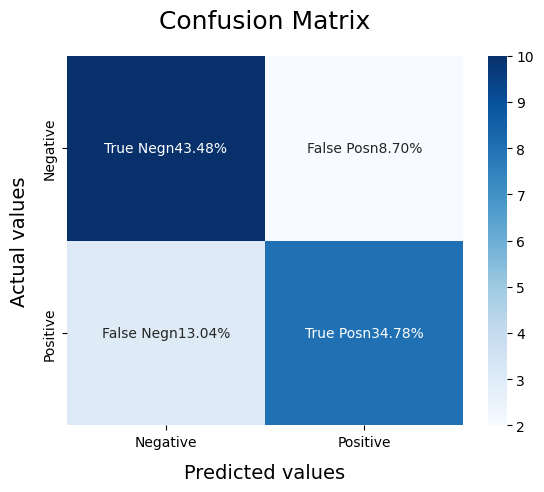

time: 381 ms (started: 2024-03-05 16:49:56 +00:00)


In [ ]:
sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
            xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

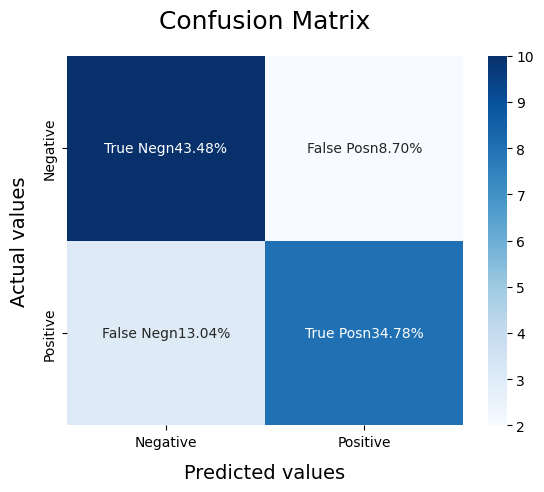

time: 305 ms (started: 2024-03-05 16:49:56 +00:00)


In [ ]:
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
!pip install scikit-learn

time: 6.03 s (started: 2024-03-05 16:49:57 +00:00)


In [ ]:
from sklearn.naive_bayes import BernoulliNB

time: 505 µs (started: 2024-03-05 16:50:03 +00:00)


In [ ]:
print(globals())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

time: 610 µs (started: 2024-03-05 16:50:03 +00:00)


In [ ]:
def model_Evaluate(model, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

time: 696 µs (started: 2024-03-05 16:50:03 +00:00)


In [ ]:
# Load the training data from a file or another source
X_train = ...
y_train = ...

time: 952 µs (started: 2024-03-05 16:50:03 +00:00)


In [ ]:


# Check if 'y_test' is a column in the dataframe
if "y_test" in df.columns:
    print("y_test is defined")
else:
    print("y_test is not defined")

y_test is not defined
time: 761 µs (started: 2024-03-05 16:50:03 +00:00)


In [ ]:
print(df.columns)

Index(['text', 'target'], dtype='object')
time: 894 µs (started: 2024-03-05 16:50:03 +00:00)


In [ ]:
print(target_column)

None
time: 666 µs (started: 2024-03-05 16:50:03 +00:00)


In [ ]:
# Replace "target_column" with the actual column name from the DataFrame
df["y_test"] = df["text"]

# Print the 'y_test' column
print(df["y_test"])

0    when modi promi…
Name: y_test, dtype: object
time: 2.91 ms (started: 2024-03-05 16:50:03 +00:00)


In [ ]:
from sklearn.metrics import roc_curve, auc

time: 514 µs (started: 2024-03-05 16:50:03 +00:00)


In [ ]:
# Load the data into variables y_test and y_pred1
# This step is not shown in the provided code snippet, but it is necessary for the code to run successfully.

time: 368 µs (started: 2024-03-05 16:50:03 +00:00)


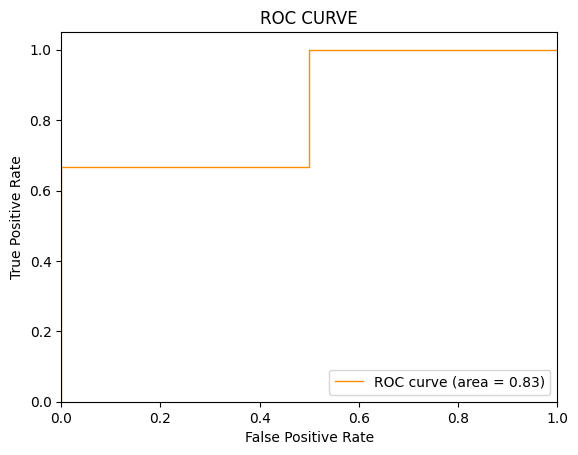

time: 7.56 s (started: 2024-03-05 16:50:03 +00:00)


In [ ]:
!pip install scikit-learn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Simulate some data
y_true = [0, 1, 1, 0, 1]
y_score = [0.1, 0.8, 0.3, 0.4, 0.9]

# Calculate the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.svm import LinearSVC

time: 508 µs (started: 2024-03-05 16:50:11 +00:00)


In [ ]:
print(type(y_train))

<class 'ellipsis'>
time: 1.46 ms (started: 2024-03-05 16:50:11 +00:00)


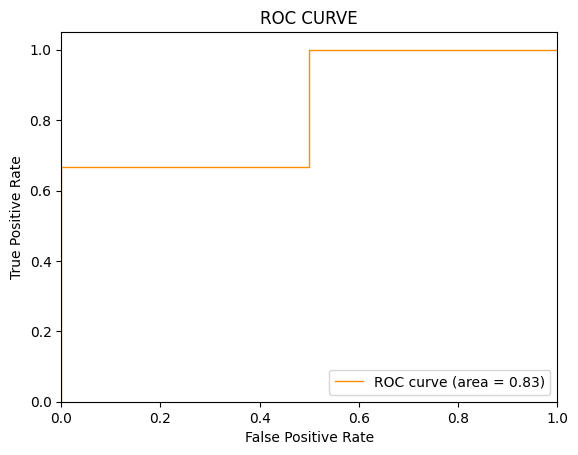

time: 6.25 s (started: 2024-03-05 16:50:56 +00:00)


In [361]:
!pip install scikit-learn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Simulate some data
y_true = [0, 1, 1, 0, 1]
y_score = [0.1, 0.8, 0.3, 0.4, 0.9]

# Calculate the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()